In [256]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
pd.set_option("max_columns",None)

# Import plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# Global variables
BNB_BLUE = '#007A87'
BNB_RED = '#FF5A5F'
BNB_DARK_GRAY = '#565A5C'
BNB_LIGHT_GRAY = '#CED1CC'

### Read Dataset

In [14]:
# Read in the calendar date
calendar = pd.read_csv('C:/yoyo/course/Udacity Data Scientist/Project 1 - Airbnb Data/seattle/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [15]:
# Read in the listings data
listings = pd.read_csv('C:/yoyo/course/Udacity Data Scientist/Project 1 - Airbnb Data/seattle/listings.csv')
listings.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

#### Assess data

In [17]:
def plot_na(df,figsize):
    
    '''
    INPUT:
    df - DataFrame
    figsize - figure size
    
    OUTPUT:
    df_na - columns with missing value
    plot - percent of missing value
    
    '''
    
    df_na = df.isna().mean()[df.isna().mean() > 0] * 100
    df_na = df_na.sort_values(ascending = False)
#     print('Columns with NaN List')
    df_na = pd.DataFrame(df_na, columns = ['Percent of NaN'])
    print(df_na)
    
    # plot
    ax = df_na.plot(kind = 'bar', figsize = figsize, color = BNB_BLUE, alpha = 0.85)
    ax.set_xlabel('Columns with missing value')
    ax.set_ylabel('Percent of NaN %')
    ax.set_title('Missing values per column, %')
    
    return plt.show()

       Percent of NaN
price       32.938998


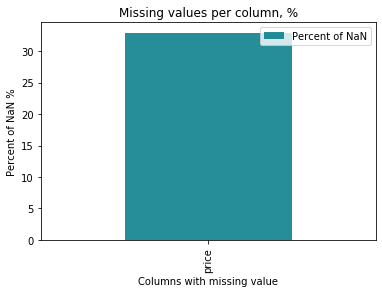

In [18]:
# NA of Calendar 
plot_na(calendar,(6,4))

                             Percent of NaN
license                          100.000000
square_feet                       97.459403
monthly_price                     60.267156
security_deposit                  51.126244
weekly_price                      47.380828
notes                             42.063908
neighborhood_overview             27.029859
cleaning_fee                      26.977475
transit                           24.463070
host_about                        22.498690
host_acceptance_rate              20.246202
review_scores_accuracy            17.234154
review_scores_checkin             17.234154
review_scores_value               17.181771
review_scores_location            17.155579
review_scores_cleanliness         17.103195
review_scores_communication       17.050812
review_scores_rating              16.946045
reviews_per_month                 16.422211
first_review                      16.422211
last_review                       16.422211
space                           

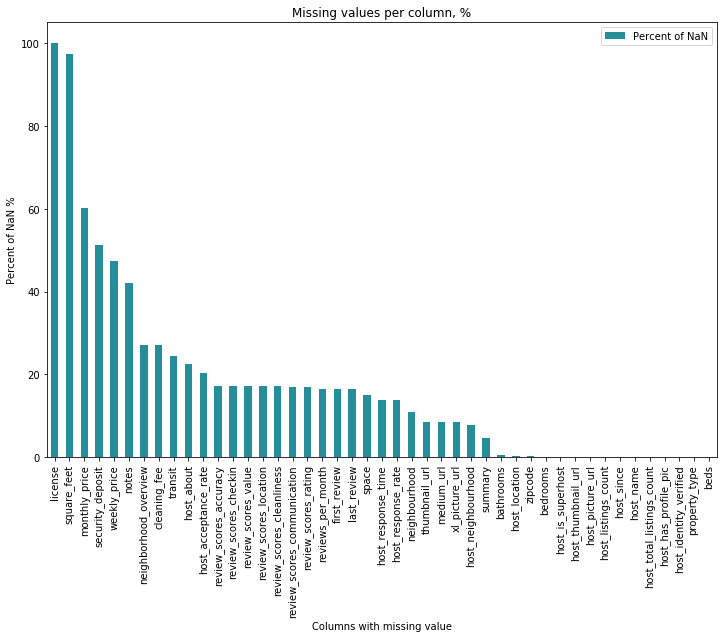

In [19]:
# NA of listings data
plot_na(listings, (12,8))


### Clean Data

In [209]:
# create dummy column for columns with multiple categories
def replace_v(x):
    res = x.replace("'",'').replace("]",'').replace('"','').replace('{','').replace('}','')
    return res

def get_val_dict(df, column):
    values_dict = {}
    for unique_value in df[column].unique():
        unique_value = replace_v(unique_value)
        for value in unique_value.split(','):
            if value in values_dict:
                values_dict[value] += 1
            else:
                values_dict[value] = 0
    
    values_dict = sorted(values_dict.items(), key = lambda kv: kv[1], reverse = True)
    return values_dict

def fill_dummy_col(row, column,item):
    val = 0
    try:
        items = replace_v(row[column])
        if item in items:
            val = 1
    except:
        val = 0
    return val

def create_dummy_col(df, column, max_dummies_num):
    '''
    INPUT:
    df - dataframe
    column - the column name of column with multiple items in each cell
    max_dummies_num - the limitation of # of dummy variable
    
    OUTPUT:
    df - the new dataframe with dummy variable and the deleted original column
    
    '''
    
    values_dict = get_val_dict(df,column)
    for value in values_dict[:max_dummies_num]:
        item = value[0]
        df[column + '_' + item] = df.apply(lambda row: fill_dummy_col(row,column,item), axis = 1)
        
    df = df.drop([column],axis = 1) # drop original column
    
    return df

# preprocess date

def get_month(date):
    month = datetime.strptime(date,'%Y-%m-%d').month
    return month

def get_year(date):
    try:
        year = datetime.strptime(date,'%Y-%m-%d').year
    except:
        year = np.nan
    return year

def req_extral_people_fee(fee):
    '''
    INPUT:
    fee - the requested fee for an extral people
    
    OUTPUT:
    res - 1/0 indicator for request extral people fee
    '''
    
    if fee == '$0.00':
        return 0
    else:
        return 1
    
# convert price to float
def convert_price(price):
    price = float(price.replace('$','').replace(',',''))
    return price

# convert rate data to float
def convert_rate(rate):
    if pd.notna(rate):
        rate = float(rate.replace('%',''))
    return rate
    
# fill NaN
def fill_mean(df,col):
    return df[col].fillna(df[col].mean())

def fill_mode(df,col):
    return df[col].fillna(df[col].mode()[0])

def fill_median(df,col):
    return df[col].fillna(df[col].median())

In [212]:
# preprocess listings
listings['price'] = listings['price'].apply(convert_price)
listings['extra_people'] = listings['extra_people'].apply(convert_price)

# process rate data
listings['host_response_rate'] = listings['host_response_rate'].apply(convert_rate)
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].apply(convert_rate)

# get host since year
listings['host_since_year'] = listings['host_since'].apply(get_year)
listings = listings.drop('host_since',axis = 1)

# create dummy column for host verification
create_dummy_col(listings,'host_verifications',10)
listings = listings.drop('host_verifications',axis = 1)

# create dummy column for amenities and calculate amenities num
create_dummy_col(listings, 'amenities',30)
listings = listings.drop('amenities', axis = 1)
# listings['amenities_num'] = listings['amenities'].apply(lambda x: len(replace_v(x).split(',')))

listings = listings.rename({'host_verifications_[email':'host_verifications_email'}, axis = 1)


In [20]:
# merge calendar and listings
listings = listings.rename(columns = {'id': 'listing_id'})
seattle_df = pd.merge(calendar, listings, on = 'listing_id')
seattle_df = seattle_df.iloc[:,:-20]


    
# drop irrelevant columns 
col_to_drop = ['listing_url','scrape_id','name','summary','space','description','experiences_offered','neighborhood_overview'
               ,'notes','transit','thumbnail_url','medium_url','picture_url','xl_picture_url' ,'host_id','host_url'
               ,'host_name','host_location','host_about','host_thumbnail_url','host_picture_url','host_total_listings_count'
               ,'host_neighbourhood','street','neighbourhood','neighbourhood_cleansed','city','state','zipcode','market'
               ,'smart_location','country_code','is_location_exact','weekly_price','monthly_price','security_deposit'
               ,'cleaning_fee','guests_included', 'calendar_updated','has_availability','availability_30','availability_60'
               ,'availability_90','availability_365','calendar_last_scraped','first_review','last_review','requires_license'
               ,'license','jurisdiction_names','require_guest_profile_picture','square_feet','price_y','available'
               ,'last_scraped','country','require_guest_phone_verification','calculated_host_listings_count']

seattle_df = seattle_df.drop(col_to_drop,axis = 1)

# drop the row where price = NaN and convert to float
seattle_df = seattle_df.dropna(subset = ['price_x']).reset_index()
seattle_df = seattle_df.drop(['index'],axis = 1)
seattle_df = seattle_df.rename({'price_x':'price'}, axis = 1)

# get month and year
seattle_df['month'] = seattle_df['date'].apply(get_month)
seattle_df['year'] = seattle_df['date'].apply(get_year)

seattle_df.head()


,listing_id,date,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,host_since_year,host_verifications_[email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_[phone,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
0,241032,2016-01-04,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
1,241032,2016-01-05,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
2,241032,2016-01-13,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
3,241032,2016-01-14,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
4,241032,2016-01-18,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1


                             Percent of NaN
host_acceptance_rate              18.223579
review_scores_checkin             15.710155
review_scores_accuracy            15.680622
review_scores_value               15.634824
review_scores_location            15.624338
review_scores_cleanliness         15.615029
review_scores_communication       15.568268
review_scores_rating              15.466079
reviews_per_month                 14.912759
host_response_time                11.611463
host_response_rate                11.611463
bathrooms                          0.513942
bedrooms                           0.214330
beds                               0.039057
property_type                      0.033064
host_identity_verified             0.009844
host_has_profile_pic               0.009844
host_listings_count                0.009844
host_is_superhost                  0.009844
host_since_year                    0.009844


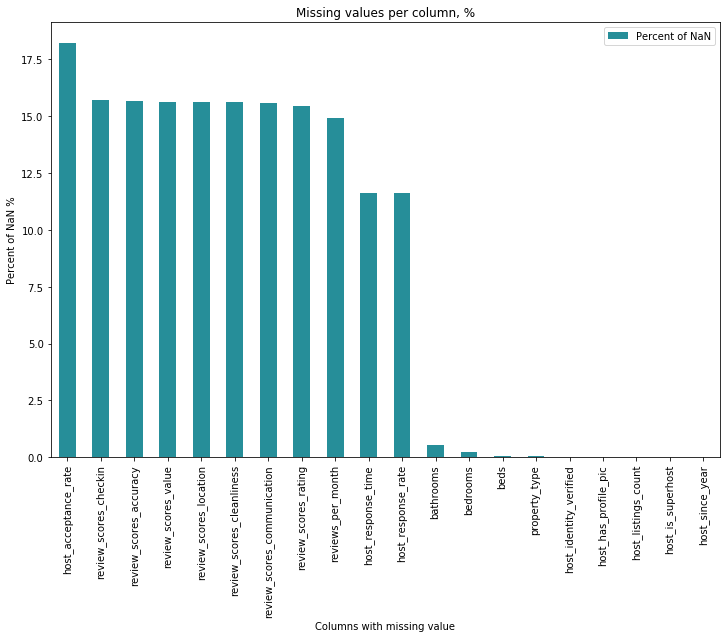

In [25]:
# NA of seattle_df
plot_na(seattle_df,(12,8))

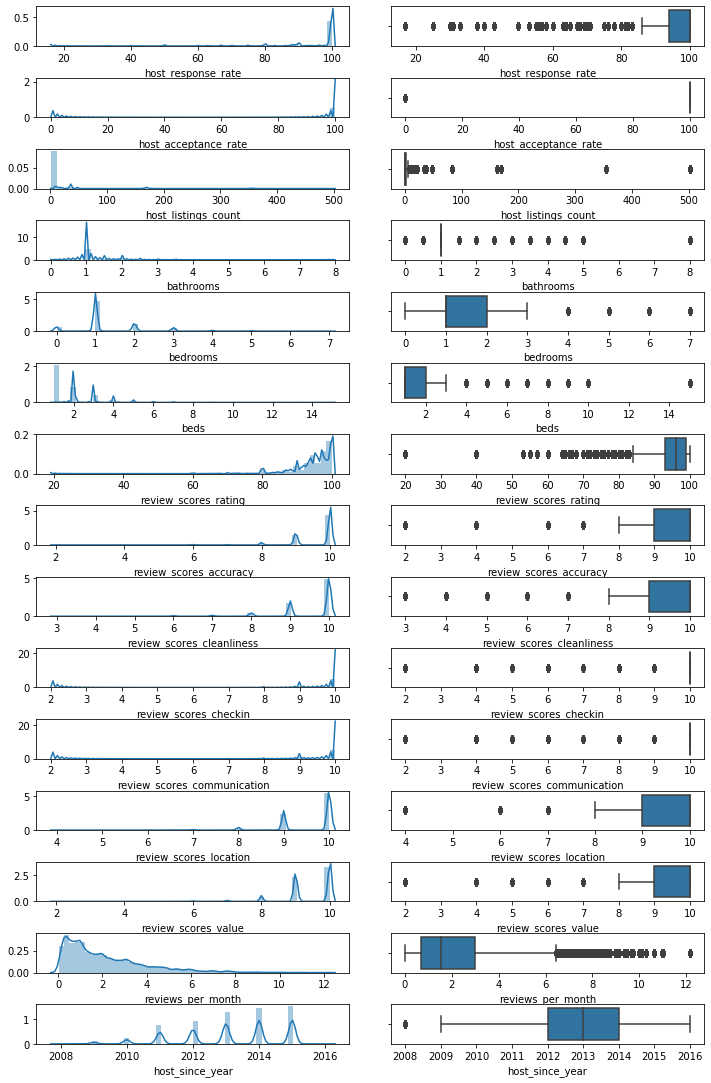

In [26]:
# distribution of missing column
nan_cols = seattle_df.columns[(seattle_df.isna().mean() > 0) & (seattle_df.dtypes == 'float64')]
n_plots = len(nan_cols)
fig, axes = plt.subplots(nrows = n_plots, ncols = 2, figsize = (10,15))
fig.tight_layout()
for i in range(n_plots):
    col_notnull = seattle_df[seattle_df[nan_cols[i]].notnull()][nan_cols[i]]
    sns.distplot(col_notnull, ax = axes[i,0])
    sns.boxplot(col_notnull, ax = axes[i,1])
    
plt.show()

In [27]:
# process NaN: since the distribution of these columns is highly skewed, I used median and mode to fill NaN
nan_cols = seattle_df.columns[seattle_df.isna().mean() > 0].tolist()
for nan_col in nan_cols:
    if seattle_df[nan_col].dtypes == 'object':
        seattle_df[nan_col] = fill_mode(seattle_df, nan_col)
    if seattle_df[nan_col].dtypes == 'float64':
        seattle_df[nan_col] = fill_median(seattle_df,nan_col)
        
seattle_df.head()

,listing_id,date,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,host_since_year,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_[phone,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV
0,241032,2016-01-04,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
1,241032,2016-01-05,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
2,241032,2016-01-13,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
3,241032,2016-01-14,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1
4,241032,2016-01-18,85.0,within a few hours,96.0,100.0,f,3.0,t,t,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1


### Analysis and Visualization

#### Distribution of price
The price data is highly right skewed and with peak price at USD 65, 100, 150, 200, 250 and 300. Also, we can see that most of Airbnb price in seattle within range USD 65 ~ 150 

C:\Users\yoyo0\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


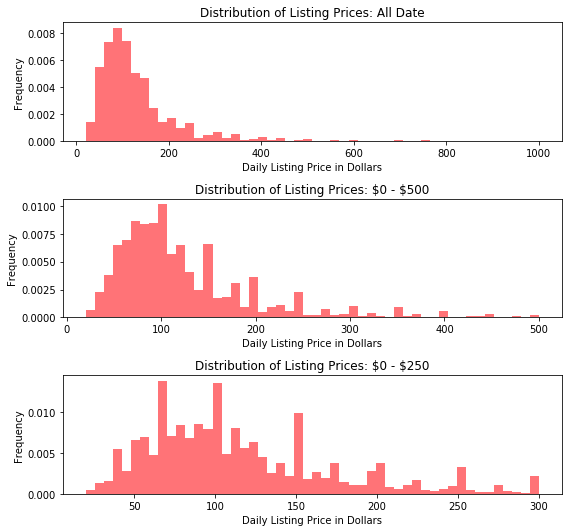

In [51]:
def plot_hist(n, titles, ranges):
    
    '''
    INPUT: 
    n - integer for subplots
    title - list of titles
    ranges - list of values
    
    OUTPUT:
    None

    '''
    
    fig, ax = plt.subplots(n, figsize = (8, 7.5))
    for i in range(n):
        d, bins, patches = ax[i].hist(ranges[i], 50, normed = 1, color = BNB_RED, alpha = 0.85)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("Daily Listing Price in Dollars")
        ax[i].set_ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    
# Visualize price table, changing them to floats and replacing the commas with a blank
prices = listings['price']

# plot histograms
n = 3
titles = ['Distribution of Listing Prices: All Date',
          'Distribution of Listing Prices: \$0 - \$500',
          'Distribution of Listing Prices: \\$0 - \$250'
         ]
ranges = [prices, prices[prices <= 500], prices[prices <= 300]]
plot_hist(n, titles, ranges)

#### Q1. Geographic analysis of price and listings: how's the distribution of listings? Which districts with most expensive listing?
We can see that the top three districts are roughly in the downtown Seattle area namely Capitol Hill and Central Area.The next most popular is Quee Anne. The pirce within downtown is larger than 100. Besides, the downtown has large number of listing with price higher than 200, especially the place near the Space Niddle. The median price in Queen Anne, downtown and Cascade is higher than others (150+ USD).


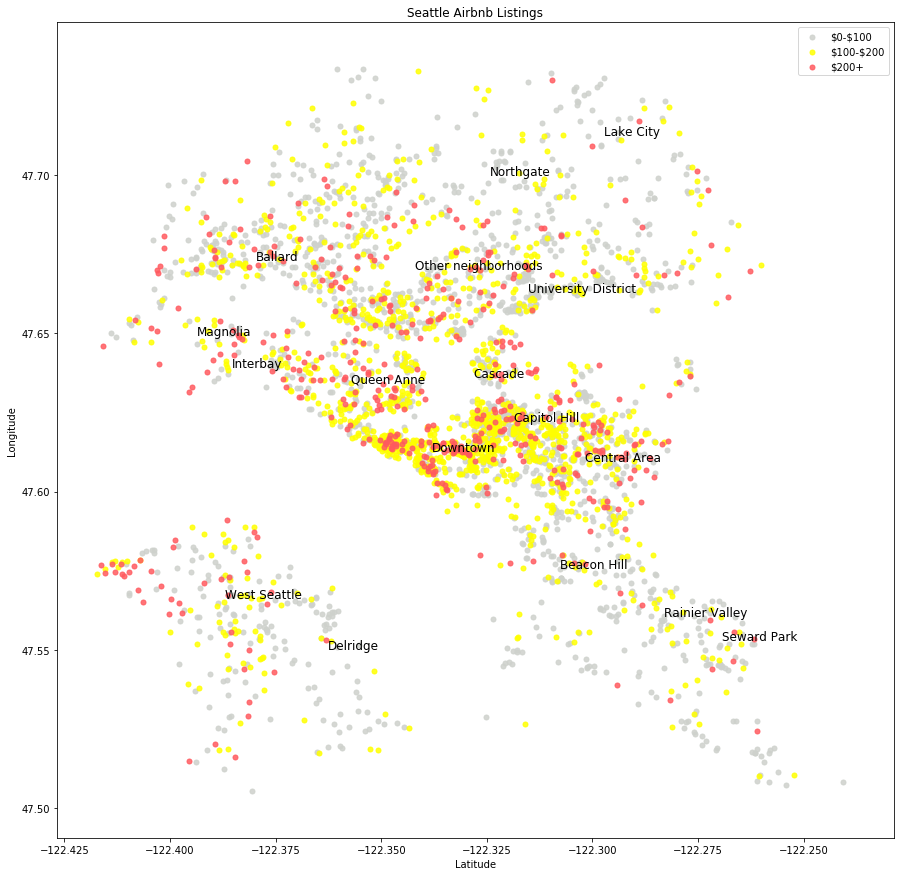

In [126]:
intervals = [0,100,200,10000]
leg_labels = []

# Get Labels for legend
for i in range(0,len(intervals) - 1):
    if i == len(intervals) - 2:
        leg_labels.append('\${}+'.format(intervals[i]))
    else:
        leg_labels.append("\${}-\${}".format(intervals[i], intervals[i+1]))    

buckets = []

# Divide up into price buckets
for i in range(0, len(intervals) - 1):
    buckets.append(listings[(prices > intervals[i]) & (prices < intervals[i+1])])
    


colors = [BNB_LIGHT_GRAY,'yellow', BNB_RED]
alphas = [0.85, 0.85, 0.85]  

# Plot listings on scatterplot
plt.figure(figsize=(15, 15))
for i in range(0, len(buckets)):
    plt.scatter(buckets[i]['longitude'], buckets[i]['latitude'], alpha = alphas[i], c=colors[i], s=25)

neighbours = listings.groupby(['neighbourhood_group_cleansed'])['longitude','latitude'].median().reset_index()
for j in range(neighbours.shape[0]):
#     print(neighbours.iloc[j])
    plt.text(neighbours['longitude'][j],neighbours['latitude'][j]
             ,neighbours['neighbourhood_group_cleansed'][j],fontsize = 12)

    
plt.title('Seattle Airbnb Listings')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(labels=leg_labels, loc = 'best')


plt.show()

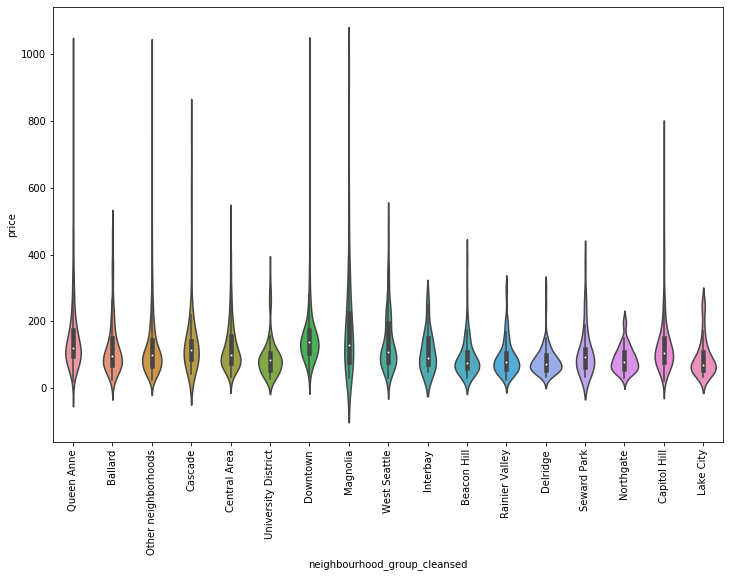

In [143]:
# sns.factorplot('neighbourhood_group_cleansed','price', data = listings, color = 'red', estimator = np.median \
#                     ,size = 4, aspect = 2)
# xt =plt.xticks(rotation=90)
plt.figure(figsize=(12,8))
sns.violinplot('neighbourhood_group_cleansed', 'price', data = listings, size = 5, aspect = 2)
xt = plt.xticks(rotation=90)

#### Q2. how the categorical variables affect the price?
##### Bedrooms
The most listings provide 1 bedrooms. The more bedrooms the higher price. By combinding with neighborhood, we can see that Captitol Hill, Other neighborhoods and Queen Anne have listing with bedrooms larger than 6. The Captitol Hill, Queen Anne and Cascade have listings with median price higher than 673 as bedrooms larger than 5, which is more expensive than others

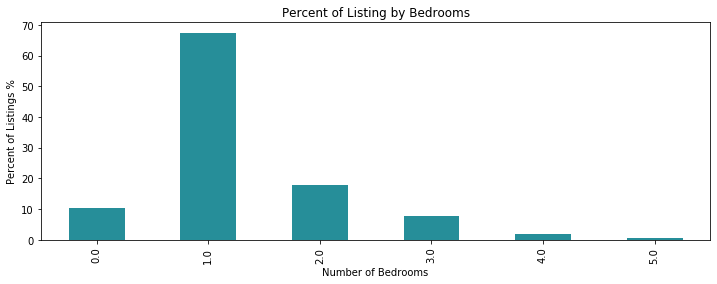

In [128]:
# bedrooms_counts = listings_b['bedrooms'].value_counts().reset_index()
# bedrooms_counts = bedrooms_counts.sort_values(by = 'index').set_index('index')
# bedrooms_percent = (bedrooms_counts/listings_b.shape[0]) * 100
# bedrooms_percent

bedrooms_counts = Counter(listings.bedrooms)
bedrooms_percent = pd.DataFrame.from_dict(bedrooms_counts, orient = 'index').sort_values(by = 0)
bedrooms_percent = (bedrooms_percent.iloc[-6:,:]/listings_b.shape[0]) * 100

# sort bedrooms dataframe by numbere
bedrooms_percent.sort_index(axis = 0, ascending = True, inplace = True)

# plot percent of listings by bedroom number
ax = bedrooms_percent.plot(kind = 'bar', figsize = (12,4), color = BNB_BLUE, alpha = 0.85)
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Percent of Listings %')
ax.set_title('Percent of Listing by Bedrooms')
ax.legend_.remove()

plt.show()

(17.0, 0.0)

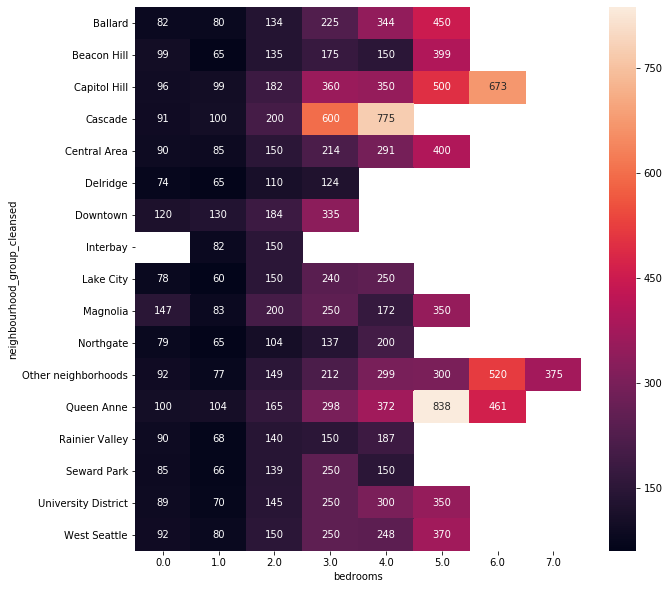

In [132]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(listings.groupby([
        'neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### How does property type affect price?
Apartment,Boungalow, Chalet, House, Loft, Other,Townhouse - no big difference in median price among districts; \
Bed & Breakfast - the median price in Queen Anne is higher than others (200+ USD) \
Boat - five districs provide this type and Other neighborhoods with highest median price (415 USD); The entire Bost is most expensice price than others \
Carbin - the Cascade have most expensive median price, which is far more than others \
Camper/RV - the Beacon Hill have most expensive price, which is far more than others \
Chalet - Other neighborhoods and west seatlte provide this type and west seattle is more expensive \
Condominium - the price at Magnolia and West seattle is far more than others \
Dorm - only Downtown has this type and it is cheap, which is with median price 40 USD \
Ten - Beacon Hill, Northgate and Other neighborhoods provide this type and there is no big difference in median price \
Treehouse - Capitol Hill, Quee Anne and West seattle provide this; The median price at Capitol Hill is far more than others \
Yurt - only West seattle provide this type


(17.0, 0.0)

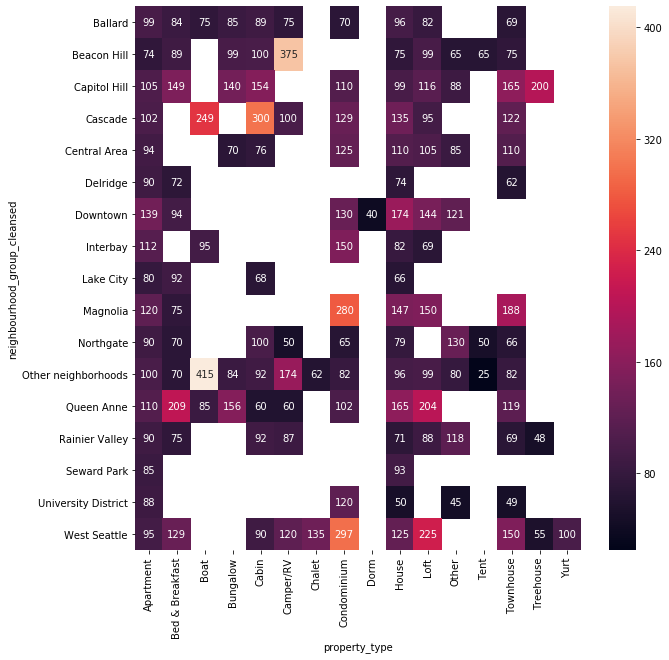

In [144]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(listings.groupby([
        'neighbourhood_group_cleansed', 'property_type']).price.median().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(16.0, 0.0)

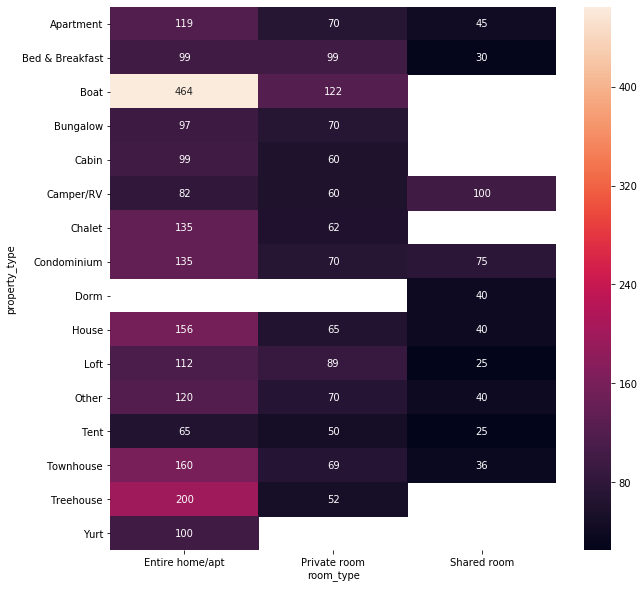

In [239]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(listings.groupby([
        'property_type', 'room_type']).price.median().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### How does amenities affect price?
The top three popular amenities are Internet, Wireless Internet and Heating (95%+ listings). The amenities Cable TV, Indoor Fireplace and Air Conditions with median price larger than 150 USD, which is higher than others; but they are not very common in listings; the percent of listins have these are lower than 51%.

                     amenities  % listings with certain amenity       price
7                     Internet                             96.7  128.374052
0            Wireless Internet                             96.0  128.478320
1                      Heating                             95.0  128.330025
2                      Kitchen                             89.7  131.808647
3               Smoke Detector                             85.9  128.848217
4                   Essentials                             84.8  127.224900
5                        Dryer                             81.6  132.623314
6                       Washer                             78.4  133.711898
9                           TV                             71.8  140.561109
8                      Shampoo                             69.9  129.882022
10    Carbon Monoxide Detector                             65.1  131.436620
12           Fire Extinguisher                             57.5  131.965847
11    Free P

(30.0, 0.0)

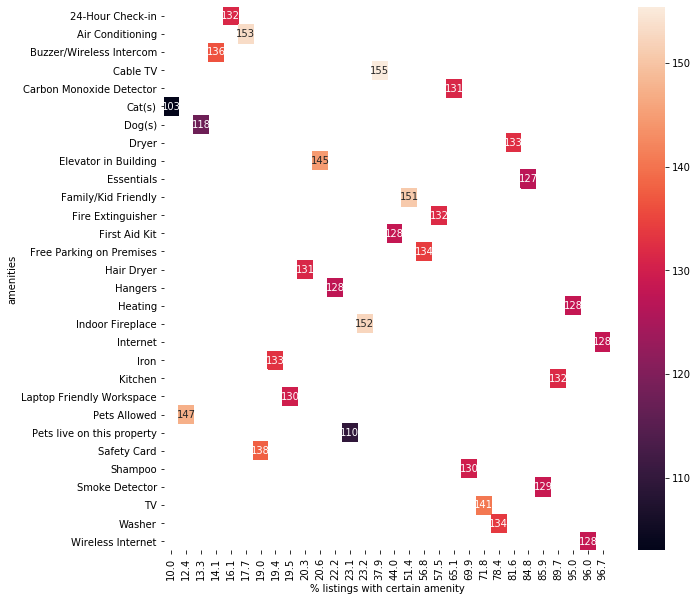

In [242]:
amenities_cols =  listings.columns[-30:]
amenities_df = pd.DataFrame(columns = ['amenities','% listings with certain amenity','price'])
amenities = []
percent_listing = []
price = []
for a_col in amenities_cols:
    amenities.append(a_col.split('_')[1])
    percent_listing.append(round(listings[listings[a_col] == 1][a_col].sum()/listings.shape[0] * 100,1))
    price.append(listings[listings[a_col] == 1]['price'].mean())   

amenities_df['amenities'] = amenities
amenities_df['% listings with certain amenity'] = percent_listing
amenities_df['price'] = price
amenities_df = amenities_df.sort_values(by = ['% listings with certain amenity'], ascending = False)
print(amenities_df)

plt.figure(figsize=(10,10))
ax = sns.heatmap(amenities_df.groupby([
        'amenities','% listings with certain amenity']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Q3. What are the seasonality of price and number of available listings in seattle?
As we can see, there is a negative correlation beteern number of available listings and mean price by month. The summer and winter holidays are the busiest time to visit Seattle. The summer holidays with highest price in a year. 

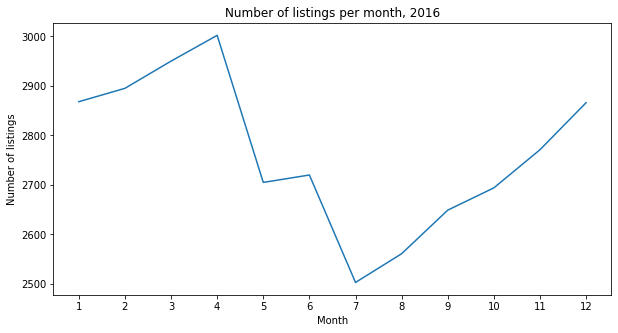

In [249]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(seattle_df[(seattle_df['month'] == i) & (seattle_df['year'] == 2016)]['listing_id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings per month, 2016')

plt.savefig('number of available listings.png')

plt.show()

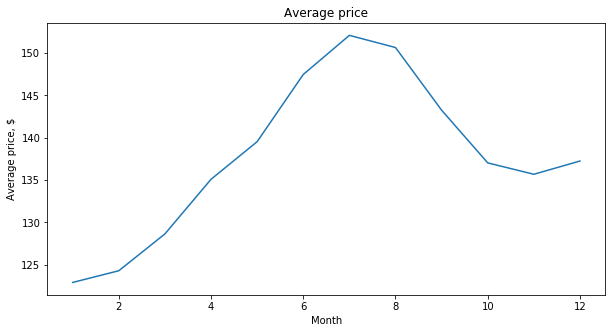

In [245]:
#find average price by month
average_price_by_month = seattle_df.groupby(['month'])['price'].mean()

#plot
plt.figure(figsize=(10,5))
plt.plot(average_price_by_month)
plt.ylabel('Average price, $')
plt.xlabel('Month')
plt.title('Average price')

plt.savefig('average price for month')

plt.show()

### Machine Learning
#### Q4. the model predict price?

In [253]:
#turn categorical columns into dummies
cat_columns = list(seattle_df.select_dtypes(include=['object']).columns)
    
for col in  cat_columns:
    seattle_df = pd.concat([seattle_df.drop(col, axis=1), pd.get_dummies(seattle_df[col], prefix=col, prefix_sep='_',

                                                         drop_first=True, dummy_na=True)], axis=1)
#drop listing_id and year columns
seattle_df = seattle_df.drop(columns = ['host_response_time','host_is_superhost','host_has_profile_pic'
                                        ,'host_identity_verified','listing_id','year','date','longitude','latitude'])
# seattle_df.head()


,price,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_since_year,host_verifications_email,host_verifications_ phone,host_verifications_ reviews,host_verifications_ facebook,host_verifications_ jumio,host_verifications_ kba,host_verifications_ linkedin,host_verifications_ google,host_verifications_ manual_offline,host_verifications_[phone,amenities_Wireless Internet,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,month,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,neighbourhood_group_cleansed_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,instant_bookable_t,instant_bookable_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan
0,85.0,96.0,100.0,3.0,4,1.0,1.0,1.0,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,85.0,96.0,100.0,3.0,4,1.0,1.0,1.0,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,85.0,96.0,100.0,3.0,4,1.0,1.0,1.0,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,85.0,96.0,100.0,3.0,4,1.0,1.0,1.0,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,85.0,96.0,100.0,3.0,4,1.0,1.0,1.0,5.0,1,365,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07,2011.0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [258]:
X = seattle_df.drop(columns = 'price')
y = seattle_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state = 42, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 186.669, test: 211.225
Random Forest R^2 train: 0.983, test: 0.981


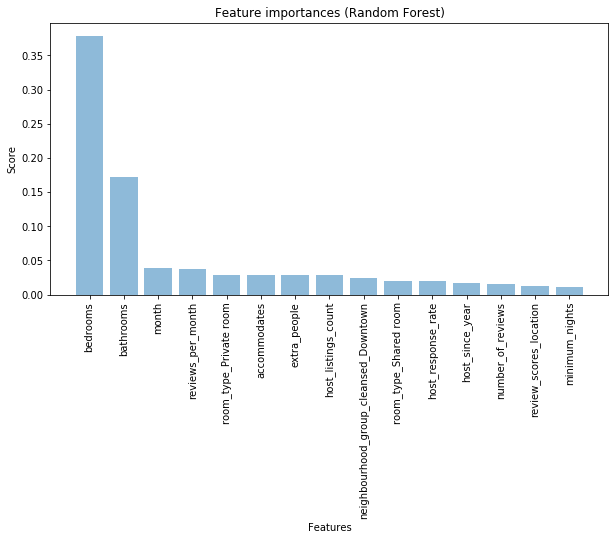

In [259]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
forest_feature_importances = pd.DataFrame(values, columns = headers)
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()